# Linear Regressions 

> shows the Relation between age and car purchase amount at that age

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Load the data you receive into a Pandas DataFrame.-> Show the first five rows of the data set.

In [2]:
df =pd.read_csv('../input/car-purchasing-model/Car_Purchasing_Data.csv')
df.head(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


### Showing the description and the info of the data set.

    About this file
    This File contain the information of the various people with the following detail which can help us to find out the better prediction and also help us to train our model to predict the correct value and get a good F1 Score.
    Customer Name
    Customer e-mail
    Country
    Gender
    Age
    Annual Salary
    Credit Card Debt
    Net Worth (Asset – Liabilities)

In [3]:
X = df['Age'].values
X

array([42, 41, 43, 58, 57, 57, 47, 50, 47, 43, 50, 53, 44, 48, 55, 53, 45,
       48, 52, 59, 52, 48, 46, 47, 40, 53, 28, 56, 46, 40, 33, 40, 51, 51,
       46, 51, 50, 22, 51, 48, 42, 46, 38, 39, 61, 55, 42, 51, 41, 40, 41,
       56, 46, 37, 52, 57, 34, 43, 50, 42, 42, 42, 55, 53, 53, 43, 55, 43,
       57, 52, 45, 56, 41, 48, 56, 47, 53, 57, 39, 45, 33, 44, 40, 40, 37,
       40, 44, 43, 58, 32, 50, 59, 42, 50, 53, 47, 46, 43, 49, 43, 53, 36,
       30, 37, 48, 44, 42, 50, 30, 42, 46, 55, 44, 58, 42, 57, 43, 35, 43,
       35, 34, 48, 53, 47, 54, 51, 59, 49, 51, 40, 53, 45, 45, 37, 43, 48,
       49, 48, 45, 43, 62, 46, 51, 44, 57, 60, 39, 61, 50, 37, 45, 50, 32,
       34, 45, 50, 51, 53, 34, 56, 57, 48, 40, 50, 47, 39, 36, 44, 47, 33,
       42, 47, 40, 54, 38, 40, 45, 51, 38, 34, 50, 42, 33, 56, 57, 37, 51,
       63, 53, 51, 48, 41, 39, 45, 70, 51, 51, 42, 50, 40, 44, 52, 41, 57,
       54, 50, 37, 52, 43, 52, 64, 51, 55, 47, 36, 39, 45, 47, 47, 60, 59,
       36, 47, 38, 42, 33

In [4]:
Y = df['Car Purchase Amount'].values.astype(int) #using .astype( 'dtype' ) from 'https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/'
Y

array([35321, 45115, 42925, 67422, 55915, 56611, 28925, 47434, 48013,
       38189, 59045, 42288, 28700, 49258, 49510, 53017, 41814, 43901,
       44633, 54827, 51130, 43402, 47240, 46635, 45078, 44387, 37161,
       49091, 58350, 43994, 17584, 44650, 66363, 53489, 39810, 51612,
       38978, 10092, 35928, 54823, 45805, 41567, 28031, 27815, 68678,
       68925, 34215, 37843, 37883, 48734, 27187, 63738, 48266, 46381,
       31978, 48100, 47380, 41425, 38147, 32737, 37348, 47483, 49730,
       40093, 42297, 52954, 48104, 43680, 52707, 49392, 30841, 49373,
       41903, 45058, 52991, 50958, 41357, 44434, 38502, 41221, 38399,
       41456, 30394, 42384, 39002, 19553, 45167, 36019, 50937, 12895,
       38955, 51221, 25971, 60670, 54075, 40004, 61593, 39503, 52474,
       42187, 57441, 22681, 33640, 31540, 60461, 45738, 34803, 34642,
       27586, 54973, 49142, 58840, 57306, 51941, 30240, 67120, 42408,
       41451, 42592, 34521, 42213, 41913, 59416, 51402, 54755, 47143,
       64391, 37252,

In [5]:
x_train, x_test ,y_train, y_test =train_test_split(X,Y, train_size=0.80,test_size=0.20,random_state=777)



### creating the linear regression model

In [6]:
model = LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)
model.coef_,model.intercept_  # finding coeficeint and intercipt pointwith y axis to draw the Red Regression Line

(array([854.9914453]), 4767.377042839435)

### Predicting the output based on regression model

In [7]:
y_predict= model.predict(x_test.reshape(-1,1)).astype(int) #astype used again ref link is up
y_predict

array([36402, 40677, 51791, 50081, 40677, 38967, 34692, 42387, 37257,
       48371, 34692, 58631, 64616, 53501, 37257, 56921, 44096, 45806,
       32127, 44096, 49226, 54356, 35547, 47516, 38967, 41532, 50936,
       43241, 38112, 43241, 35547, 41532, 47516, 42387, 50936, 41532,
       44951, 58631, 38967, 50081, 41532, 39822, 45806, 53501, 47516,
       42387, 47516, 50081, 45806, 43241, 50936, 42387, 42387, 45806,
       44096, 35547, 53501, 53501, 48371, 47516, 37257, 40677, 32127,
       40677, 48371, 38112, 38112, 49226, 55211, 44951, 53501, 40677,
       47516, 50081, 38112, 43241, 49226, 48371, 40677, 34692, 33837,
       38112, 44951, 39822, 50936, 50936, 45806, 41532, 53501, 41532,
       43241, 42387, 36402, 53501, 37257, 39822, 45806, 45806, 51791,
       47516])

### finding training accuracy

In [8]:
train_accuracy= model.score(x_train.reshape(-1,1),y_train)
train_accuracy

0.4200738311926854

In [9]:
train_accuracy= model.score(x_test.reshape(-1,1),y_test)
train_accuracy

0.3317320540473093

In [10]:
new_tested_data=np.array([36]).reshape(-1,1)

In [11]:
model.predict(new_tested_data)

array([35547.06907358])

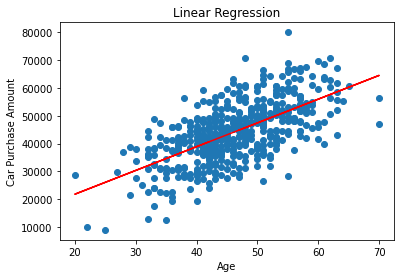

In [12]:
%matplotlib inline
plt.scatter(X,Y)
plt.xlabel("Age")
plt.ylabel("Car Purchase Amount")
plt.title("Linear Regression")
m, b = np.polyfit(X,Y, 1)


plt.plot(X, m*X + b,'Red')

## in conclusuion

    1- The data is very huge and very varied so it showed in some how a good relation
    between Age and The Amount of money would this person pay for his age 
    
    2- The data can be better when the amount of salary is added to the equation
    
    3- Based on data the higher the age , the more money would be spent on more expensive car
    

> **Double Checking the work with the help of Excel proprties**

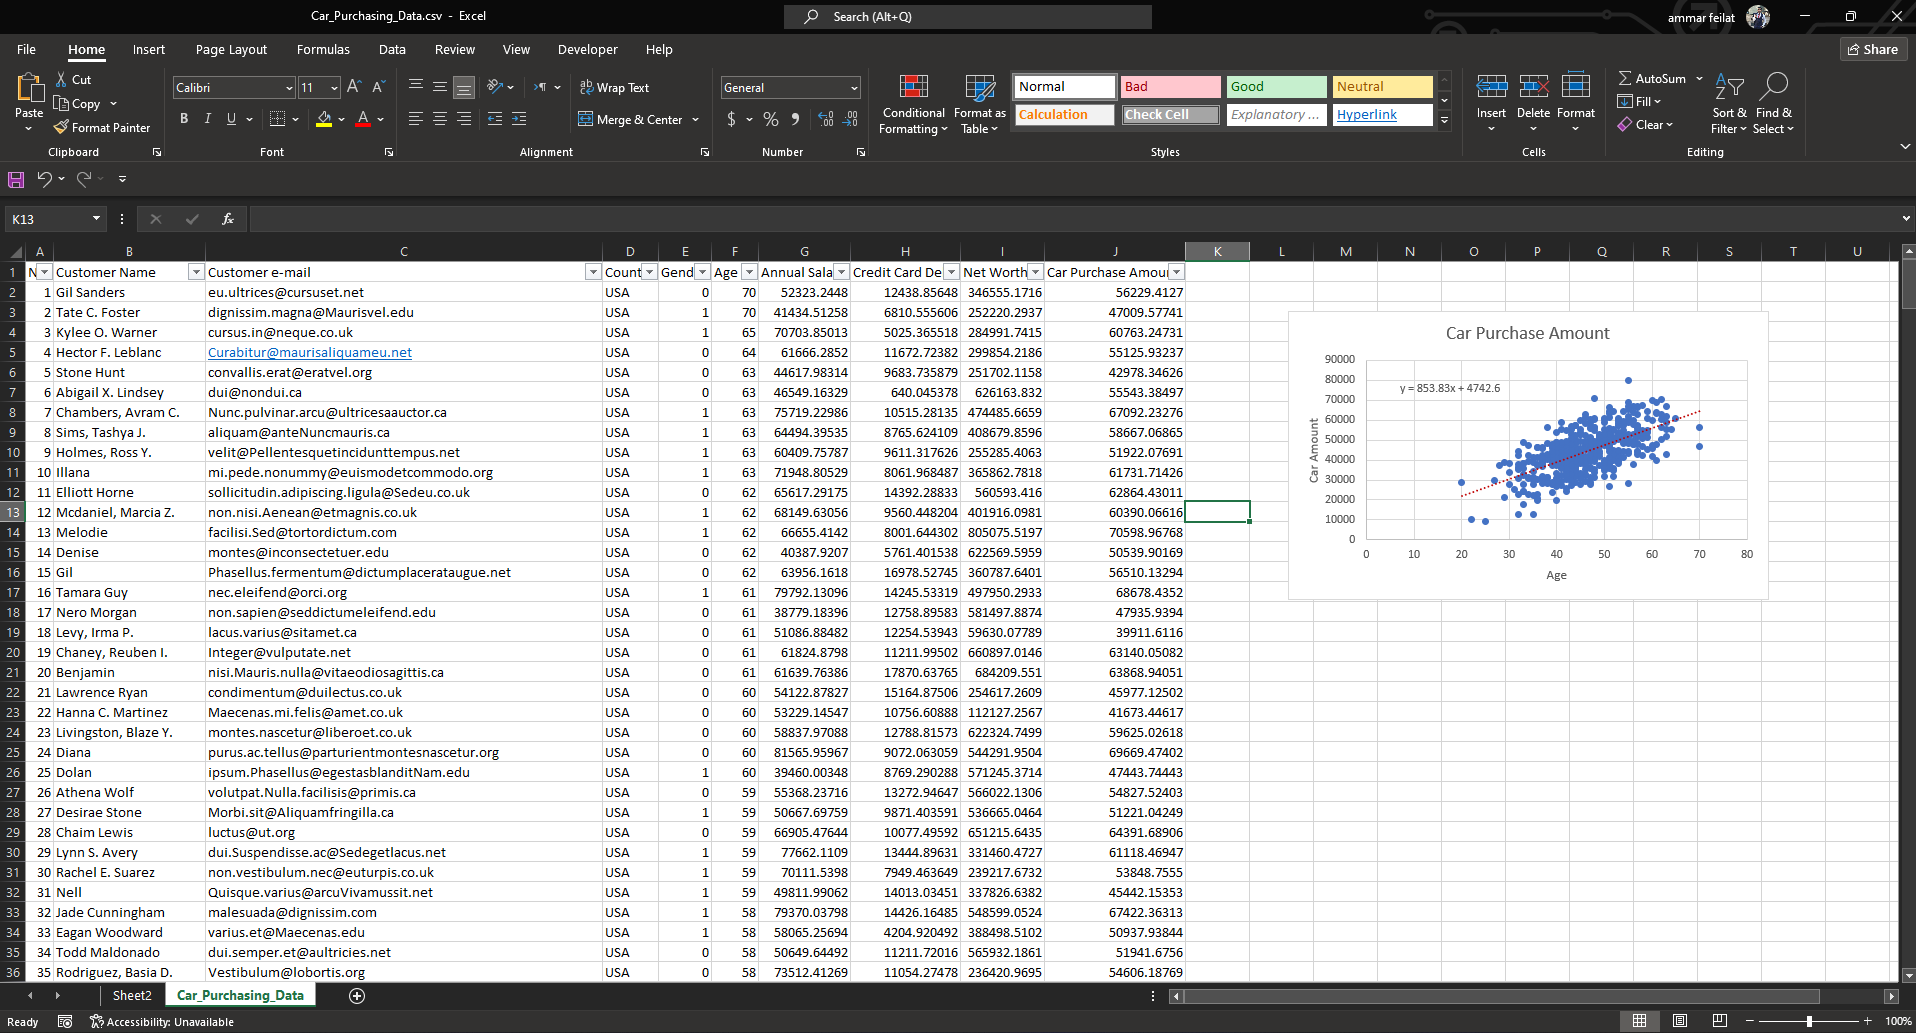